**HW 1** <br>
20214591 정윤진

In [219]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

**Problem #2: Discrete Fourier Transform (20 pts.)**

In [220]:
# Utils
def plot_amp(x, fs, title, sample_num=None):
    ############################
    # x: np.array
    # fs: int
    # title: str
    # offset: float(sec)
    # duration: float(sec)
    ############################
    plt.figure(figsize=(10, 5))
    n = np.arange(x.shape[0] if sample_num==None else sample_num)
    plt.plot(n/fs, x if sample_num==None else x[:sample_num])
    plt.grid(True)
    plt.title(title)
    plt.xlabel('Second')
    plt.ylabel('Amplitude')
    
def show_db_and_phase(x_fft, freq_range):
    plt.figure(figsize=(10,10))
    
    plt.subplot(2, 1, 1)
    x_mag = np.abs(x_fft)
    x_db = 20 * np.log10(x_mag/max(x_mag))
    plt.plot(freq_range, x_db)
    plt.grid(True)
    plt.title('dB Scale')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Decibel(dB)')
    
    plt.subplot(2, 1, 2)
    x_phs = np.angle(x_fft)
    plt.stem(freq_range, x_phs)
    plt.title('Phase')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('???')

First, generate a sinusoidal waveform with 440Hz frequency and 8kHz sampling rate (1 second long). Verify the result by plotting the waveform and playing it back.

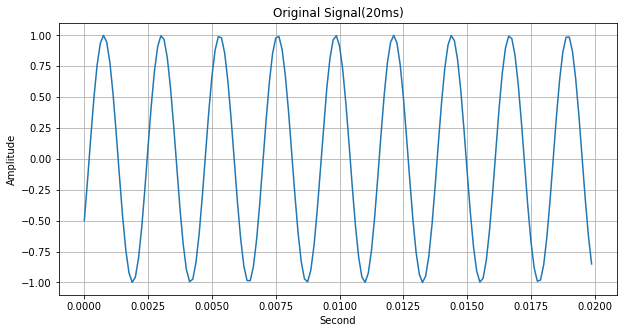

In [221]:
fs = 8000       # sampling rate
dur = 1         # duration, 1 second
f0 = 440        # frequency
ph = np.pi/6    # Initial Phase

window_size = 160
fft_size = 256

# Scaling factor for x-axis
freq_range = np.arange(-(fft_size/2), (fft_size/2))*fs/fft_size

# Display audio
x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs - ph)
ipd.display(ipd.Audio(x, rate=fs))
plot_amp(x, fs, 'Original Signal(20ms)', sample_num=160)

1. Segment the sinusoid with a 20ms-long rectangular window (size 160 samples) and perform DFT (size 256 samples) on the segment with zero-padding. Plot the magnitude response in dB and phase response (5pts.)

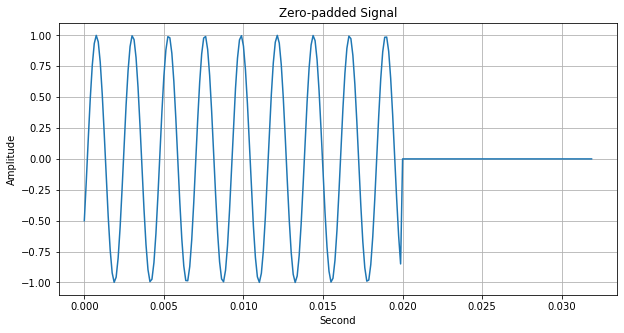

In [222]:
x_seg = x[:window_size]
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Zero-padded Signal')

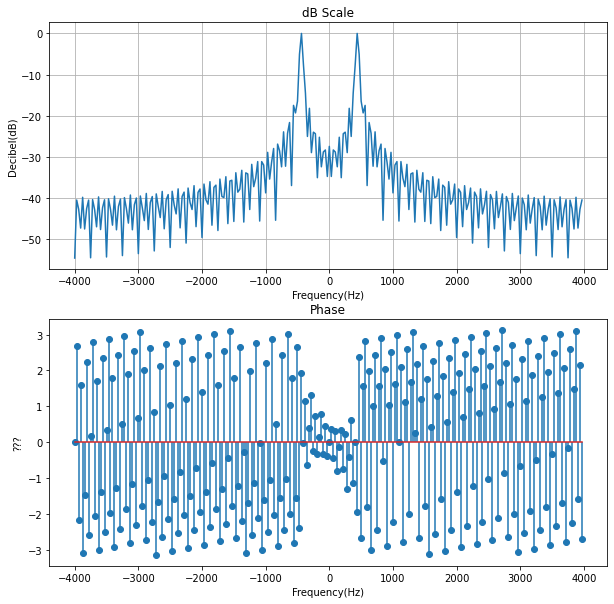

In [223]:
x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_db_and_phase(x_fft, freq_range)

2. Repeat 1 with Hann window. Discuss the difference in the magnitude response. (5 pts.)

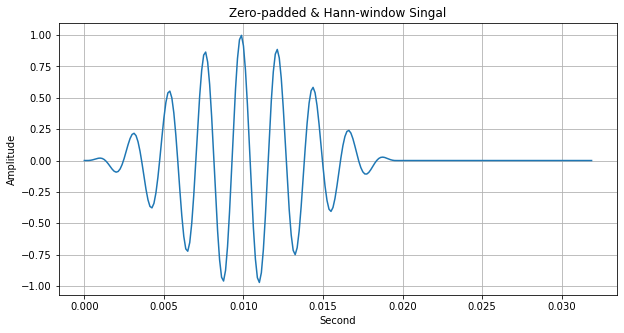

In [224]:
x_seg = x[:window_size]
x_seg = x_seg * np.hanning(window_size)
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Zero-padded & Hann-window Singal')

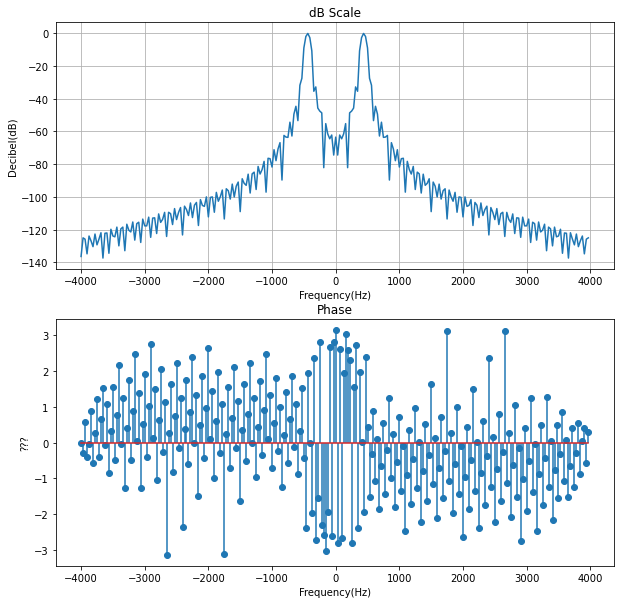

In [225]:
x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_db_and_phase(x_fft, freq_range)

3. Repeat 2 with zero-padding such that FFT size becomes 1024. Discuss the difference in the magnitude response. (10 pts.

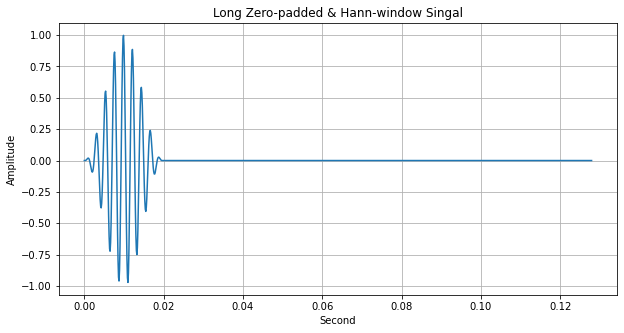

In [226]:
fft_size = 1024
x_seg = x[:window_size]
x_seg = x_seg * np.hanning(window_size)
x_seg = np.append(x_seg, np.zeros(fft_size-window_size))
plot_amp(x_seg, fs, 'Long Zero-padded & Hann-window Singal')

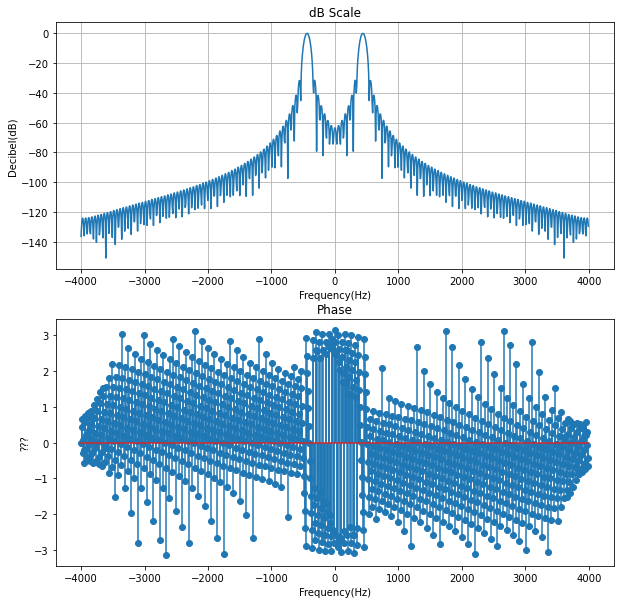

In [227]:
# Re-calculate the scaling factor
freq_range = np.arange(-(fft_size/2), (fft_size/2))*fs/fft_size

x_fft = np.fft.fft(x_seg)
x_fft = np.fft.fftshift(x_fft, axes=0)
show_db_and_phase(x_fft, freq_range)

**Problem #3: Short-time Fourier Transform (50 pts.)**
1. Implement a short-time Fourier transform function as follows (20pts.):

In [228]:
import torch

### Your Implementation of STFT ###
def stft(x, window, hop_size, fft_size):
    ################################
    # x: input samples (1-D vector)
    # window: a window vector (e.g. window = hann(1024) where 1024 is the window size )
    # hop_size: must be less than window size
    # y: 2-D STFT matrix (complex numbers)
    ################################
    sample_size = x.shape[0]
    window_size = window.shape[0]
    frame_size = int((sample_size-window_size)/hop_size)+1
    
    y = [np.fft.rfft(x[i*hop_size:i*hop_size+window_size] * window) for i in range(frame_size)]
    return np.array(y).T # Transpose from (Time, Freq) to (Freq, Time)

### Utils ###
def plot_result(y):
    magnitude = np.abs(y)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    plt.figure(figsize=(15,5))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_size)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram (dB)")
    
def load_audio(f_name, offset=0, duration=None):
    x = librosa.load(f_name, sr=sr, offset=offset, duration=duration)[0]
    audio = ipd.Audio(x, rate=sr)
    ipd.display(audio)
    return x

2. Load the provided glockenspiel WAV file and plot the spectrogram using your STFT function. Plot the spectrogram with two different window sizes such that one has high-time resolution and the other high frequency resolution. Describe what you observe (10 pts.)

In [229]:
# Set Hyper Parameters & Window
sr = 16000
x = load_audio('./glockenspiel_short.wav')

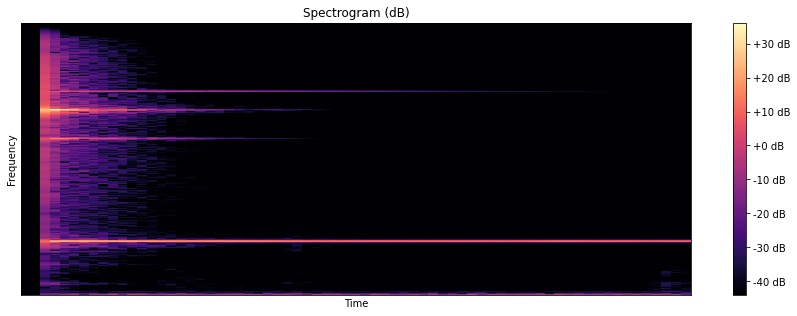

In [230]:
# High frequency resolution(=Low time resoultion)
hop_size = 512
fft_size = 1024
window_size = 1024
window = np.hanning(window_size)

y = stft(x, window, hop_size=hop_size, fft_size=fft_size)
plot_result(y)

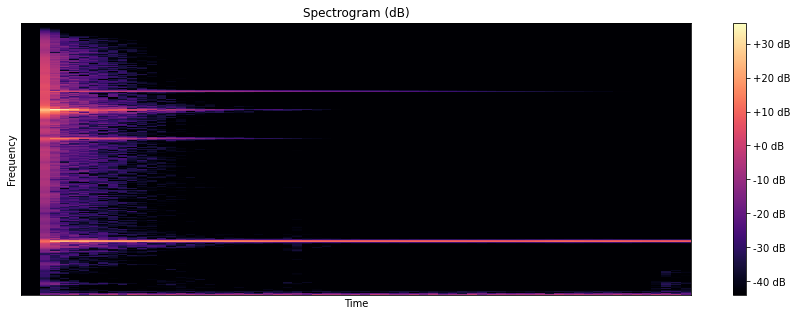

In [231]:
# Compare with the result from librosa
lib_y = librosa.stft(x, n_fft=fft_size, hop_length=hop_size, win_length=window_size, center=False)
plot_result(lib_y)

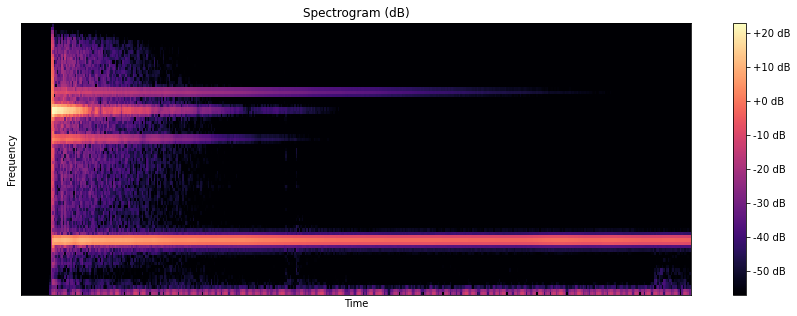

In [232]:
# Low frequency resolution(=high time resolution)
window = np.hanning(160)
y = stft(x, window, hop_size=80, fft_size=160)
plot_result(y)

3. Record your voice using Audacity (about 2-3 sec) and store it as a .wav file. Repeat b), particularly paying attention to vowel sounds. (10 pts.)

In [233]:
# Set dropdown selection widget
import ipywidgets as widgets

w = widgets.Dropdown(
    options=[('으아_1', 'wak_1'), 
             ('으아_2', 'wak_2'),
             ('으아_3', 'wak_3'),
             ('감자', 'gamja'),
             ('감자튀김', 'gamja_fries'), 
             ('도리도리', 'doridori'),
             ('오타마톤', 'otamatone'),
             ('베이스슬랩', 'bass_slap')],
    value='wak_1',
    description='오디오 선택:',
)

w.observe(on_change)
ipd.display(w)

Dropdown(description='오디오 선택:', options=(('으아_1', 'wak_1'), ('으아_2', 'wak_2'), ('으아_3', 'wak_3'), ('감자', 'gamj…

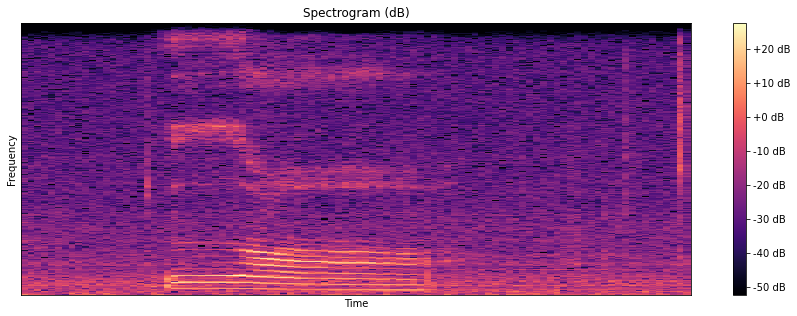

In [234]:
# 오디오 선택 후 셀 다시 실행 해주세요
x = load_audio('./voice_examples/{}.wav'.format(w.value))
y = stft(x, np.hanning(1024), hop_size=512, fft_size=1024)
plot_result(y)

4. Choose a music audio file (less than 10 seconds) and plot the spectrogram. Again, adjust the STFT parameters and see how they change the spectrogram. Compare your visual observation to what you hear in terms of musical element such as melodic or rhythm patterns. (10 pts.)

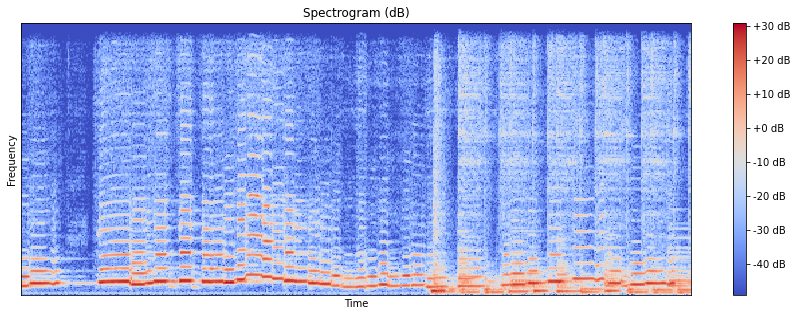

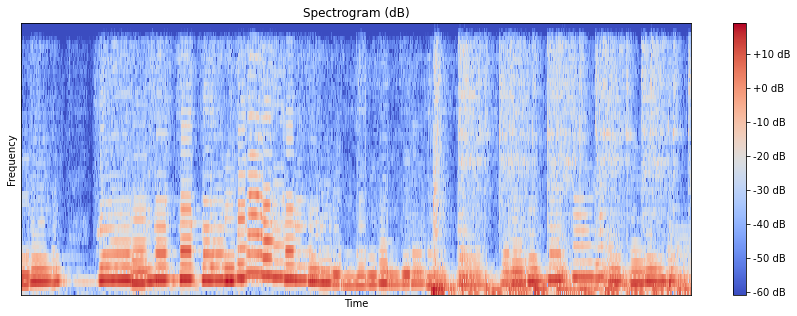

In [235]:
x = load_audio('./music_example_2.wav', offset=4, duration=8)

fft_size=512
y = stft(x, np.hanning(fft_size), hop_size=fft_size//2, fft_size=fft_size)
plot_result(y)

fft_size=128
y = stft(x, np.hanning(fft_size), hop_size=fft_size//2, fft_size=fft_size)
plot_result(y)